In [1]:
import numpy as np
import pandas as pd
import featuretools as ft
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
#%matplotlib inline


path = 'C:\\Users\\mksam\\OneDrive\\Documents\\Python Scripts\\feature selection lesson\\abalone\\'

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Exploratory Data Analysis

In [3]:
data = pd.read_csv(path + 'abalone.data',header = None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.columns = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']

In [6]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


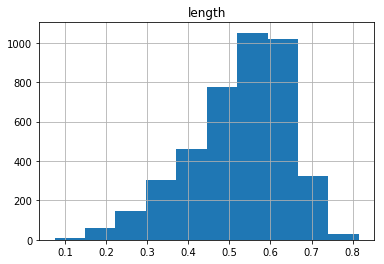

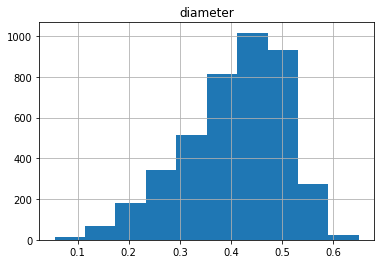

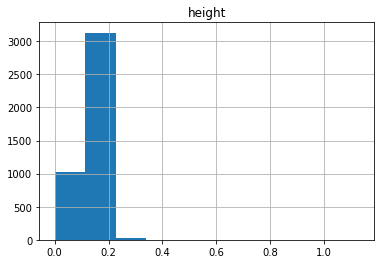

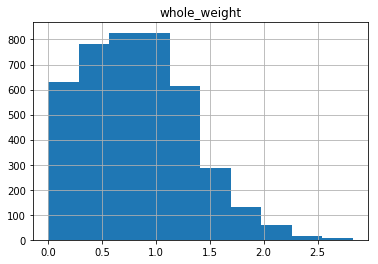

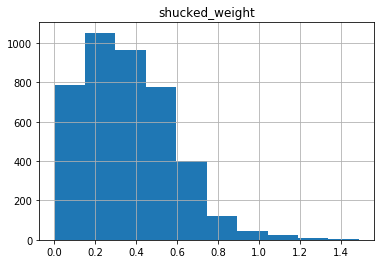

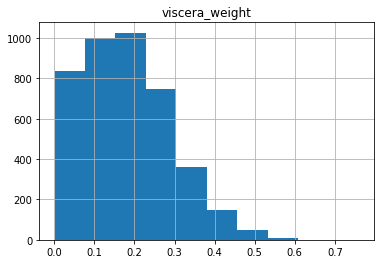

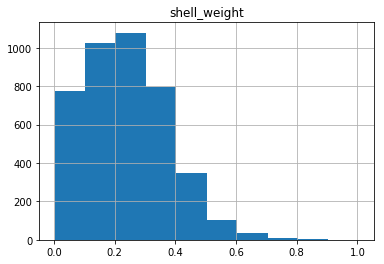

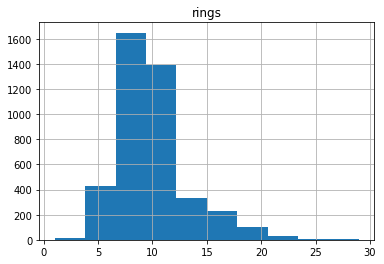

In [9]:
for column in data.columns:
    
    if data[column].dtype != 'object':
       pyplot.title(column)
       data.loc[:,column].hist()
       pyplot.show()

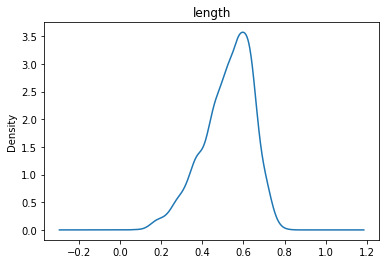

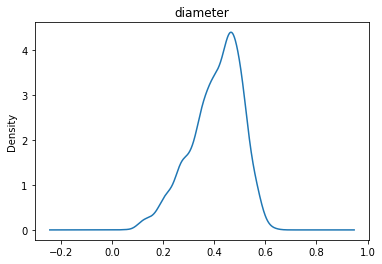

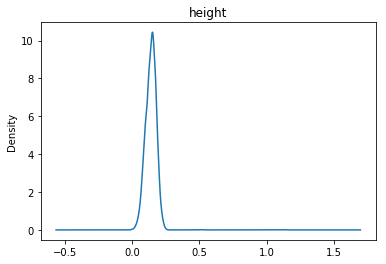

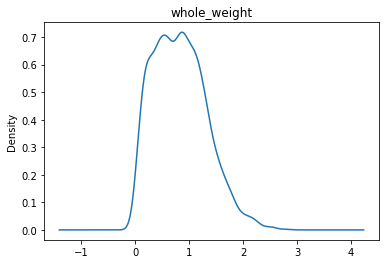

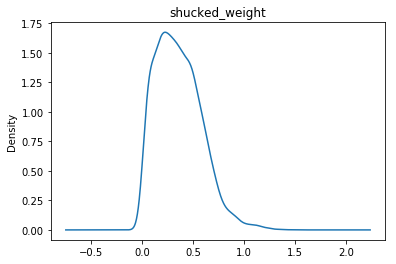

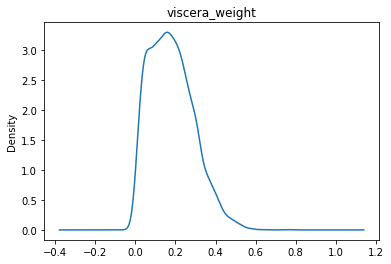

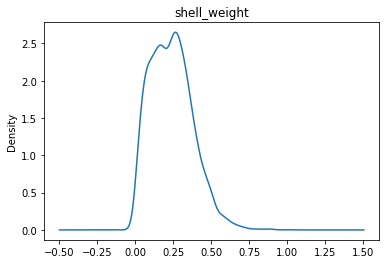

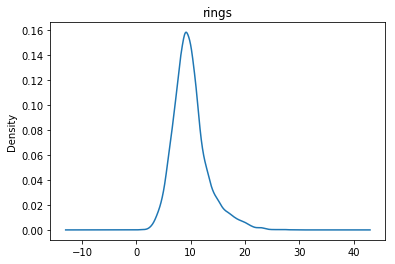

In [10]:
for column in data.columns:
    
    if data[column].dtype != 'object':
    
        pyplot.title(column)
        data.loc[:,column].plot(kind='density')
        pyplot.show()

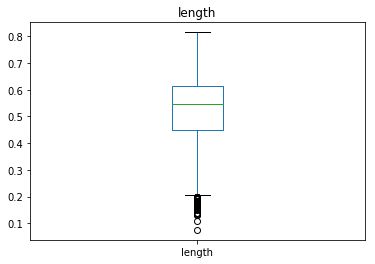

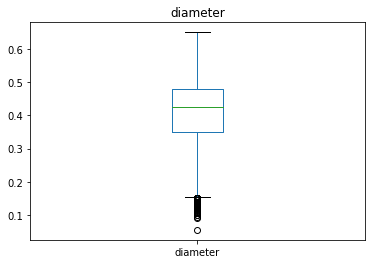

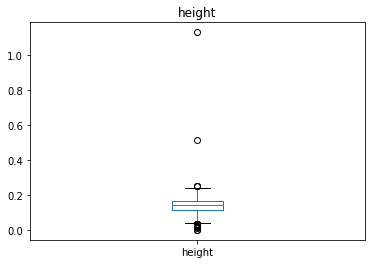

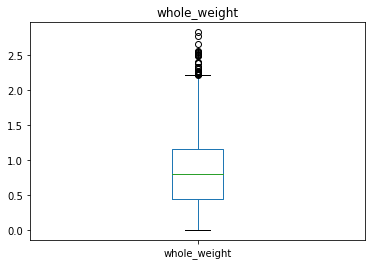

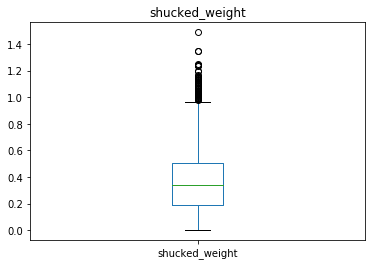

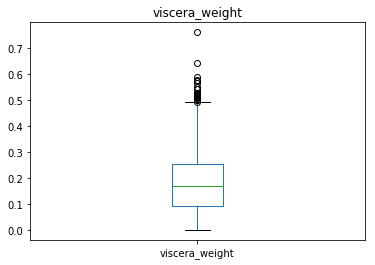

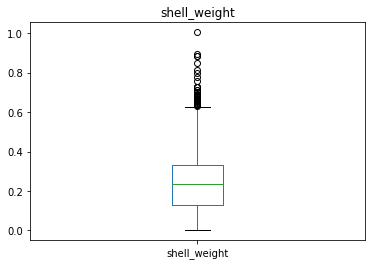

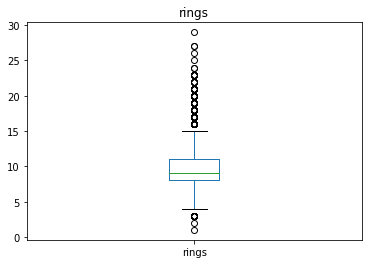

In [11]:
#Box Plots

for column in data.columns:
    
    if data[column].dtype != 'object':
        
        data.loc[:,column].plot(kind='box')
        pyplot.title(column)
        pyplot.show()


<Figure size 432x288 with 0 Axes>

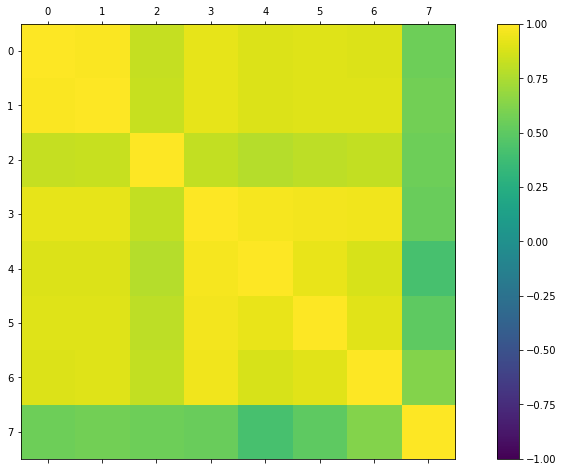

In [12]:
#Correllation Matrix
fig = pyplot.figure()
fig,(ax) = pyplot.subplots(figsize=(15,8))
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

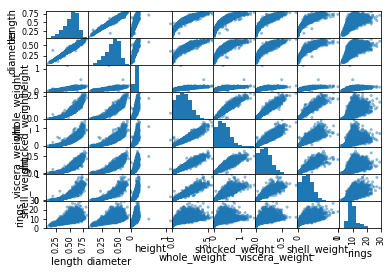

In [13]:
#Scatter Matix (First 10 Features Only)

scatter_matrix(data.iloc[:,range(0,len(data.columns))])
pyplot.show()

# Data Preprocessing

In [14]:
X = data.iloc[:,0:8]
Y = data.iloc[:,8].astype(int)

X_enc = pd.get_dummies(X, columns=['sex'])


In [15]:
X_enc.head()


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


# Models with Unscaled Data

In [16]:
validation_size = 0.20
seed =7
X_train, X_validation, Y_train, Y_validation = train_test_split(X_enc,Y,test_size=validation_size,random_state=seed)

In [17]:
X_train.shape, X_validation.shape

((3341, 10), (836, 10))

LR -4.851247 (0.6799887910183924)
Lasso -10.185296 (1.1639780848389165)
EN -9.335336 (1.144610854806393)
KNN -5.004868 (0.7205981279544571)
CART -8.771602 (1.0793592448650322)
SVR -5.931361 (0.9346781724346672)
AB -7.205064 (0.9799230610785156)
GBR -4.681745 (0.5460016444647241)
ET -5.204954 (0.6218853554708029)
RF -5.058446 (0.5939536709069825)


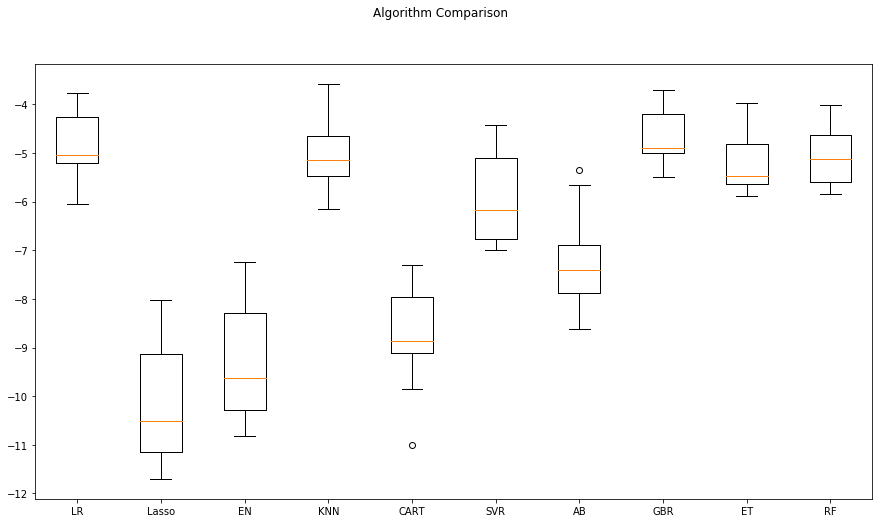

In [18]:
#Baseline Comparison - Compare Performance of a Range of Models on Training Data

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

seed = 7

#prepare Models

models = []
models.append(('LR',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor(random_state=seed)))
models.append(('SVR',SVR(gamma='auto',verbose=0)))
models.append(('AB', AdaBoostRegressor(random_state=seed)))
models.append(('GBR', GradientBoostingRegressor(random_state=seed)))
models.append(('ET',ExtraTreesRegressor(random_state=seed)))
models.append(('RF',RandomForestRegressor(random_state=seed)))

#evaluate each model

results=[]
names=[]
scoring='neg_mean_squared_error'
for name, model in models:
    #print ('Running model {model}'.format(model=model))
    kfold=KFold(n_splits=10, random_state=seed)
    cv_results= cross_val_score(model,X_train,Y_train,cv=kfold, scoring=scoring,verbose=0)
    #print ('Results:{results}'.format(results=cv_results))
    results.append(cv_results)
    names.append(name)
    print("%s %f (%r)" % (name, cv_results.mean(),cv_results.std()))
    
#boxplot comparison of all CV folds for each model

fig = pyplot.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [19]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
X = data.iloc[:,0:8]
Y = data.iloc[:,8].astype(float)


# Models with Scaled Data

In [21]:
validation_size = 0.20
seed =7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [22]:
X_train.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
4077,I,0.550,0.435,0.125,0.7410,0.3480,0.1585,0.2060
3375,F,0.460,0.330,0.150,0.5325,0.2085,0.1805,0.1250
1078,I,0.420,0.310,0.095,0.2790,0.1255,0.0510,0.0880
4034,M,0.510,0.405,0.125,0.6925,0.3270,0.1550,0.1805
79,F,0.615,0.475,0.170,1.1025,0.4695,0.2355,0.3450


In [23]:
#Determine numeric features

numeric_features = []
categorical_features = []

for column in X.columns:
    
    if X[column].dtype == float:
        
        numeric_features.append(column)
        
    else:
        
        categorical_features.append(column)
        
print(numeric_features)
print(categorical_features)

['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
['sex']


In [24]:
#Custom Transformers

from sklearn.base import BaseEstimator, TransformerMixin


class column_selector(BaseEstimator,TransformerMixin):
    
    def __init__(self, columns:list):
        self.cols = columns

    def fit(self,X,y=None):
        return self

    def transform(self, X, y=None):
       
        return X.loc[:, self.cols]


class dummy_creator(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        
        pass
    
    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        
        X_categorical_scaled_df = pd.get_dummies(X)
        return X_categorical_scaled_df 
    
    
class DFStandardScaler(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        
        self.ss = None
        
        
    def fit(self,X,y=None):
        
        self.ss = StandardScaler().fit(X)
        return self
    
    def transform(self, X):
        
        Xss = self.ss.transform(X)
        X_continuous_scaled_df = pd.DataFrame(Xss, index=X.index, columns=X.columns)
        return X_continuous_scaled_df

In [25]:
#Create PreProcessing Pipeline

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


pipeline_categorical = Pipeline(steps = [
            ('column_selector', column_selector(categorical_features)),
            ('create_dummies', dummy_creator())
           ])


pipeline_continuous = Pipeline(steps = [
            ('column_selector', column_selector(numeric_features)),
            ('scaler',DFStandardScaler())
           ])

feature_union = FeatureUnion([('cat', pipeline_categorical),
                      ('cont', pipeline_continuous)])
                
                  

#Check to see that feature_union works

feature_union.fit_transform(X_train)


array([[ 0.        ,  1.        ,  0.        , ..., -0.05977797,
        -0.21011127, -0.24460191],
       [ 1.        ,  0.        ,  0.        , ..., -0.68765273,
        -0.00946558, -0.82457039],
       [ 0.        ,  1.        ,  0.        , ..., -1.06122696,
        -1.19053907, -1.08949426],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.32903018,
        -1.43678605, -1.50478033],
       [ 0.        ,  0.        ,  1.        , ..., -1.43255075,
        -1.42310567, -1.43317929],
       [ 0.        ,  1.        ,  0.        , ..., -1.16699798,
        -1.29542204, -1.34725803]])

ScaledLR -4.855104 (0.6820130408238625)
ScaledLasso -7.225636 (1.0071488630444727)
ScaledKNN -5.225071 (0.6505611426645058)
ScaledEN -6.849702 (1.0405037694803736)
ScaledCART -8.917144 (0.9900427753906091)
ScaledSVR -4.634350 (0.6906934215345043)
ScaledAB -7.767910 (0.8493438038948314)
ScaledGBC -4.680115 (0.5433704759293366)
ScaledRF -5.001524 (0.6288708350413152)
ScaledET -5.223715 (0.6014986152385259)


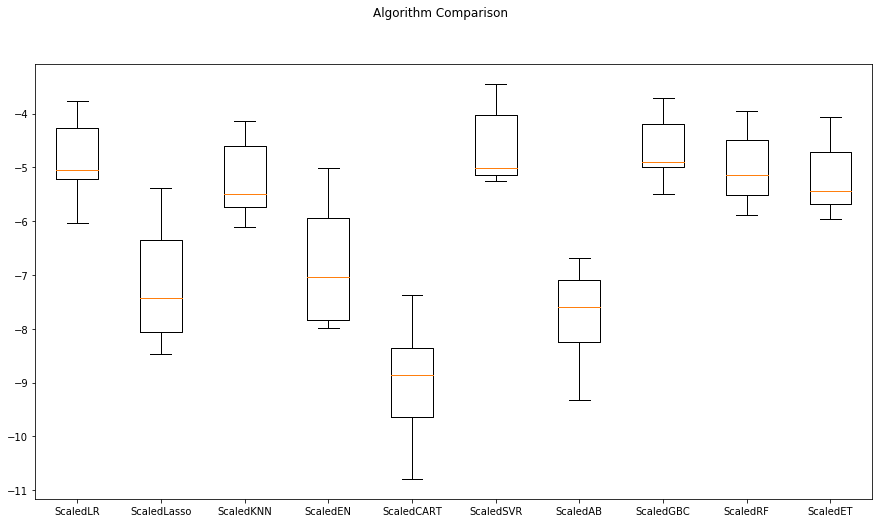

In [26]:
#Compare Performance of above models, several ensemble models, with scaled data:

seed = 7 

#prepare Models

pipelines = []

pipelines.append(('ScaledLR',Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLasso',Pipeline([('Lasso',Lasso())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledEN', Pipeline([('EN',ElasticNet())])))
pipelines.append(('ScaledCART', Pipeline([('CART',DecisionTreeRegressor(random_state=seed))])))
pipelines.append(('ScaledSVR',Pipeline([('SVR',SVR(gamma='auto',verbose=0))])))
pipelines.append(('ScaledAB', Pipeline([('AB',AdaBoostRegressor(random_state=seed))])))
pipelines.append(('ScaledGBC', Pipeline([('GBR',GradientBoostingRegressor(random_state=seed))])))
pipelines.append(('ScaledRF', Pipeline([('RF',RandomForestRegressor(random_state=seed))])))
pipelines.append(('ScaledET', Pipeline([('ET',ExtraTreesRegressor(random_state=seed))])))

#evaluate each model

results=[]
names=[]
scoring='neg_mean_squared_error'
for name, model in pipelines:
    
    X_train_enc = feature_union.fit_transform(X_train)
    y_train = Y_train.values

    kfold=KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train_enc, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s %f (%r)" % (name, cv_results.mean(),cv_results.std()))

    
#boxplot comparison

fig = pyplot.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
#Tune Best Model Parameters (SVR)

from sklearn.model_selection import GridSearchCV

model = SVR(gamma='auto',verbose=0)

param_grid = {'C':[.001, .01, .1, 1.0], 
              'kernel':[ 'linear', 'poly', 'rbf', 'sigmoid'],
              'epsilon': [.0001, .001, .01, .1]}
kfold=KFold(n_splits=10, random_state=7)

grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_enc, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
stds = grid_result.cv_results_['std_test_score']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with:  %r" % (mean,stdev,param))

C:\Users\mksam\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -4.634509 using {'C': 1.0, 'epsilon': 0.1, 'kernel': 'rbf'}
-7.074487 (1.143917) with:  {'C': 0.001, 'epsilon': 0.0001, 'kernel': 'linear'}
-8.663150 (1.375849) with:  {'C': 0.001, 'epsilon': 0.0001, 'kernel': 'poly'}
-9.382454 (1.242261) with:  {'C': 0.001, 'epsilon': 0.0001, 'kernel': 'rbf'}
-8.836094 (1.239008) with:  {'C': 0.001, 'epsilon': 0.0001, 'kernel': 'sigmoid'}
-7.074435 (1.144176) with:  {'C': 0.001, 'epsilon': 0.001, 'kernel': 'linear'}
-8.663185 (1.375561) with:  {'C': 0.001, 'epsilon': 0.001, 'kernel': 'poly'}
-9.382288 (1.242129) with:  {'C': 0.001, 'epsilon': 0.001, 'kernel': 'rbf'}
-8.836363 (1.238409) with:  {'C': 0.001, 'epsilon': 0.001, 'kernel': 'sigmoid'}
-7.075613 (1.143795) with:  {'C': 0.001, 'epsilon': 0.01, 'kernel': 'linear'}
-8.661621 (1.373242) with:  {'C': 0.001, 'epsilon': 0.01, 'kernel': 'poly'}
-9.380707 (1.241522) with:  {'C': 0.001, 'epsilon': 0.01, 'kernel': 'rbf'}
-8.836798 (1.237165) with:  {'C': 0.001, 'epsilon': 0.01, 'kernel': 'sigmoid'

In [28]:
#Finalize Model

from sklearn.metrics import mean_squared_error

model = SVR(gamma='auto',verbose=0, C=1.0  ,kernel='rbf', epsilon= 0.1)
model.fit(X_train_enc, y_train)

X_validation_enc = feature_union.transform(X_validation)
y_validation = Y_validation.values

predictions = model.predict(X_validation_enc)
print(mean_squared_error(Y_validation, predictions))



5.258560158123488
